In [76]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, f1_score, auc

In [40]:
df = pd.read_csv("Bank_Transaction_Risk_Dataset.csv")

In [41]:
df.head()

,Transaction_Amount,Account_Balance,Customer_Tenure_Months,Daily_Transaction_Count,Transaction_Hour,Failed_Login_Attempts,Transaction_Type,Merchant_Category,Device_Type,Country,Account_Type,KYC_Status,High_Risk_Transaction
0,5993.43,3684.99,42,3,19,1,transfer,gambling,mobile,IN,savings,unverified,No
1,4723.47,35809.54,115,3,9,0,Cash_Out,gambling,mobile,IN,current,verified,No
2,6295.38,5628.33,78,6,22,0,transfer,gambling,mobile,IN,current,Verified,No
3,8046.06,7777.62,10,5,8,0,cash_out,travel,desktop,india,savings,verified,No
4,4531.69,9775.65,111,2,1,0,TRANSFER,GAMBLING,desktop,BD,business,Verified,No


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Transaction_Amount       790 non-null    float64
 1   Account_Balance          790 non-null    float64
 2   Customer_Tenure_Months   800 non-null    int64  
 3   Daily_Transaction_Count  800 non-null    int64  
 4   Transaction_Hour         800 non-null    int64  
 5   Failed_Login_Attempts    800 non-null    int64  
 6   Transaction_Type         790 non-null    object 
 7   Merchant_Category        800 non-null    object 
 8   Device_Type              790 non-null    object 
 9   Country                  800 non-null    object 
 10  Account_Type             800 non-null    object 
 11  KYC_Status               800 non-null    object 
 12  High_Risk_Transaction    800 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 81.4+ KB


In [43]:
#seeing duplicate value
df.duplicated().sum()

np.int64(0)

In [44]:
#seeing NAN value
df.isna().sum()

Transaction_Amount         10
Account_Balance            10
Customer_Tenure_Months      0
Daily_Transaction_Count     0
Transaction_Hour            0
Failed_Login_Attempts       0
Transaction_Type           10
Merchant_Category           0
Device_Type                10
Country                     0
Account_Type                0
KYC_Status                  0
High_Risk_Transaction       0
dtype: int64

In [45]:
df['Transaction_Amount'] = df['Transaction_Amount'].fillna(df['Transaction_Amount'].mean())

In [46]:
df['Account_Balance'] = df['Account_Balance'].fillna(df['Account_Balance'].mean())

In [47]:
df['Transaction_Type'] = df['Transaction_Type'].ffill()

In [48]:
df['Device_Type'] = df['Device_Type'].bfill()

In [49]:
le = LabelEncoder()
mms = MinMaxScaler()

In [50]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        df[col] = mms.fit_transform(df[[col]])
    else:
        df[col] = le.fit_transform(df[col])

In [51]:
df.head()

,Transaction_Amount,Account_Balance,Customer_Tenure_Months,Daily_Transaction_Count,Transaction_Hour,Failed_Login_Attempts,Transaction_Type,Merchant_Category,Device_Type,Country,Account_Type,KYC_Status,High_Risk_Transaction
0,0.096349,0.104552,0.347458,0.3,0.826087,0.25,4,3,2,2,2,1,0
1,0.079982,0.295720,0.966102,0.3,0.391304,0.00,0,3,2,2,1,2,0
2,0.100241,0.116117,0.652542,0.6,0.956522,0.00,4,3,2,2,1,0,0
3,0.122804,0.128907,0.076271,0.5,0.347826,0.00,3,4,1,3,2,2,0
4,0.077511,0.140797,0.932203,0.2,0.043478,0.00,1,0,1,0,0,0,0


Transaction_Amount


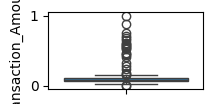

Account_Balance


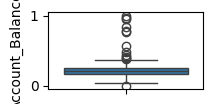

Customer_Tenure_Months


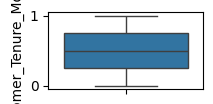

Daily_Transaction_Count


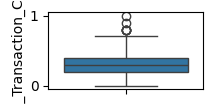

Transaction_Hour


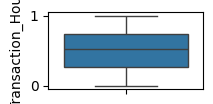

Failed_Login_Attempts


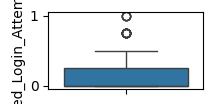

Transaction_Type


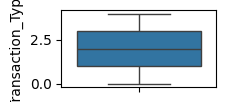

Merchant_Category


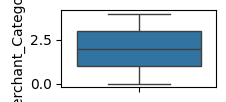

Device_Type


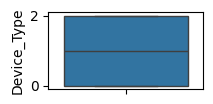

Country


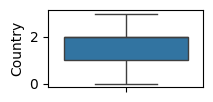

Account_Type


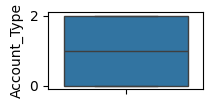

KYC_Status


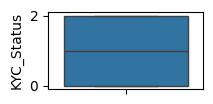

High_Risk_Transaction


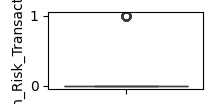

In [52]:
for col2 in df.columns:
    print(col2)
    plt.figure(figsize=(2,1))
    sns.boxplot(df[col2])
    plt.show()

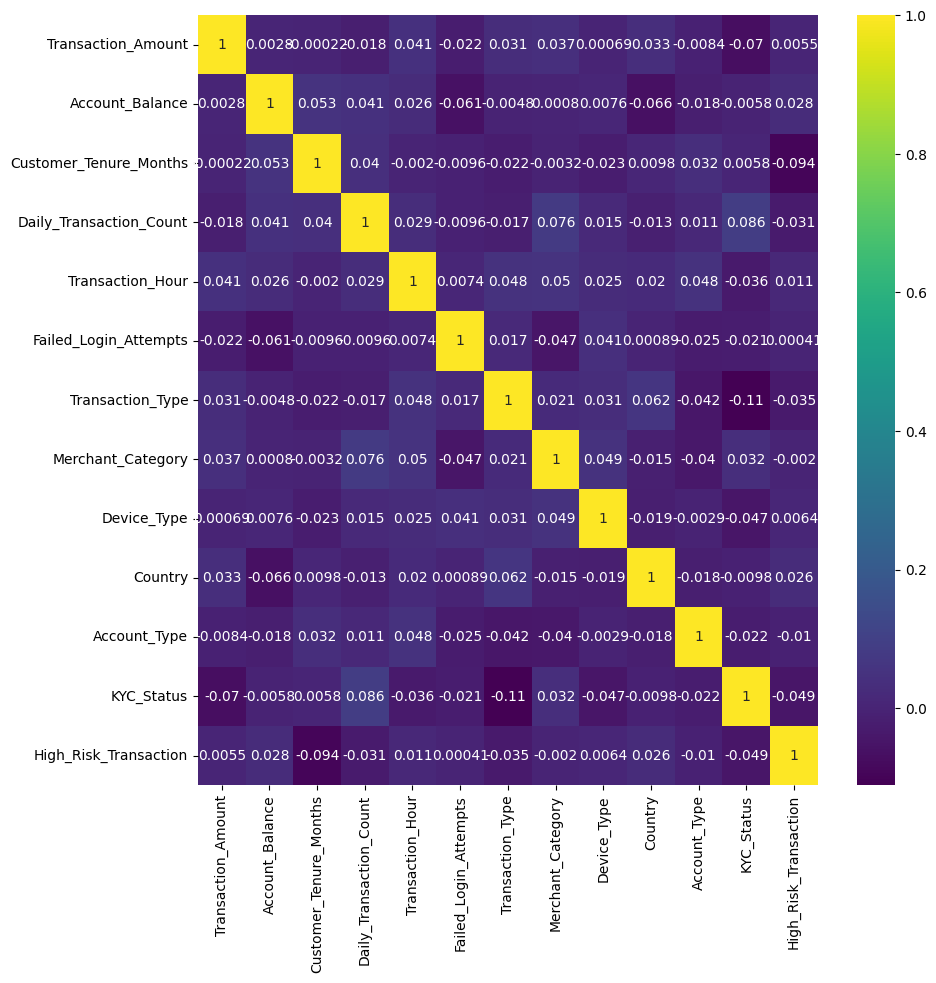

In [88]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [54]:
df[['High_Risk_Transaction']].shape

(800, 1)

In [55]:
#feature and target split
x = df.drop(['High_Risk_Transaction'], axis=1)
y = df[['High_Risk_Transaction']]

In [56]:
y.value_counts()

High_Risk_Transaction
0                        699
1                        101
Name: count, dtype: int64

In [57]:
#random over sampler
ros = RandomOverSampler()

In [58]:
new_x, new_y = ros.fit_resample(x,y)
new_x.shape, new_y.shape

((1398, 12), (1398, 1))

In [59]:
new_y.value_counts()

High_Risk_Transaction
0                        699
1                        699
Name: count, dtype: int64

In [60]:
xtrain, xtest, ytrain, ytest = train_test_split(new_x, new_y, test_size=0.2, random_state=42)

In [61]:
xtrain.head()

,Transaction_Amount,Account_Balance,Customer_Tenure_Months,Daily_Transaction_Count,Transaction_Hour,Failed_Login_Attempts,Transaction_Type,Merchant_Category,Device_Type,Country,Account_Type,KYC_Status
48,0.092403,0.228360,0.398305,0.3,0.173913,0.00,1,4,2,0,2,0
155,0.065133,0.259729,0.500000,0.2,0.608696,0.25,2,4,1,2,1,1
756,0.096262,0.155998,0.135593,0.2,0.434783,0.00,3,3,1,0,0,2
1070,0.134189,0.208122,0.093220,0.0,0.826087,0.00,3,0,0,2,2,1
303,0.099279,0.034647,0.398305,0.2,0.304348,0.00,1,2,2,2,0,1


In [62]:
ytrain.head()

,High_Risk_Transaction
48,0
155,1
756,0
1070,1
303,1


In [63]:
dect = DecisionTreeClassifier()

In [64]:
model = dect.fit(xtrain, ytrain)

In [65]:
model.score(xtrain, ytrain)

1.0

In [66]:
model.score(xtest, ytest)

0.9392857142857143

In [67]:
#prediction
pred = model.predict(xtest)

In [68]:
#confussion metrix
cm = confusion_matrix(ytest, pred)
cm

array([[123,  17],
       [  0, 140]])

<Axes: >

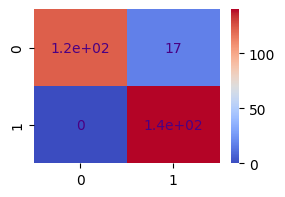

In [86]:
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True,cmap='coolwarm',annot_kws={'size':10,'color':'indigo'})

In [70]:
#classification report
cl = classification_report(ytest, pred)
print(cl)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       140
           1       0.89      1.00      0.94       140

    accuracy                           0.94       280
   macro avg       0.95      0.94      0.94       280
weighted avg       0.95      0.94      0.94       280



In [71]:
#accurac score
acc = accuracy_score(ytest, pred)
acc

0.9392857142857143

In [72]:
#f1 score
f1 = f1_score(ytest, pred)
f1

0.9427609427609428

In [73]:
#rur auc score
ras = roc_auc_score(ytest, pred)
ras

0.9392857142857143

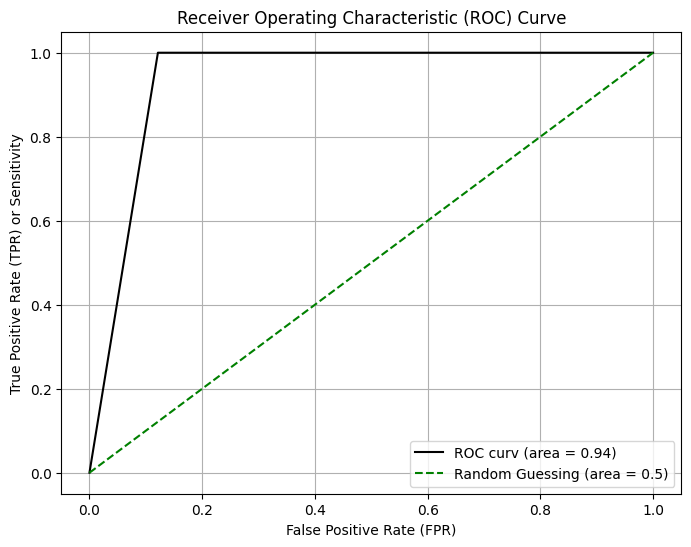

In [74]:
#roc curve
fpr, tpr, thresholds = roc_curve(ytest, pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='black', label = f'ROC curv (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='green', linestyle='--', label = 'Random Guessing (area = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

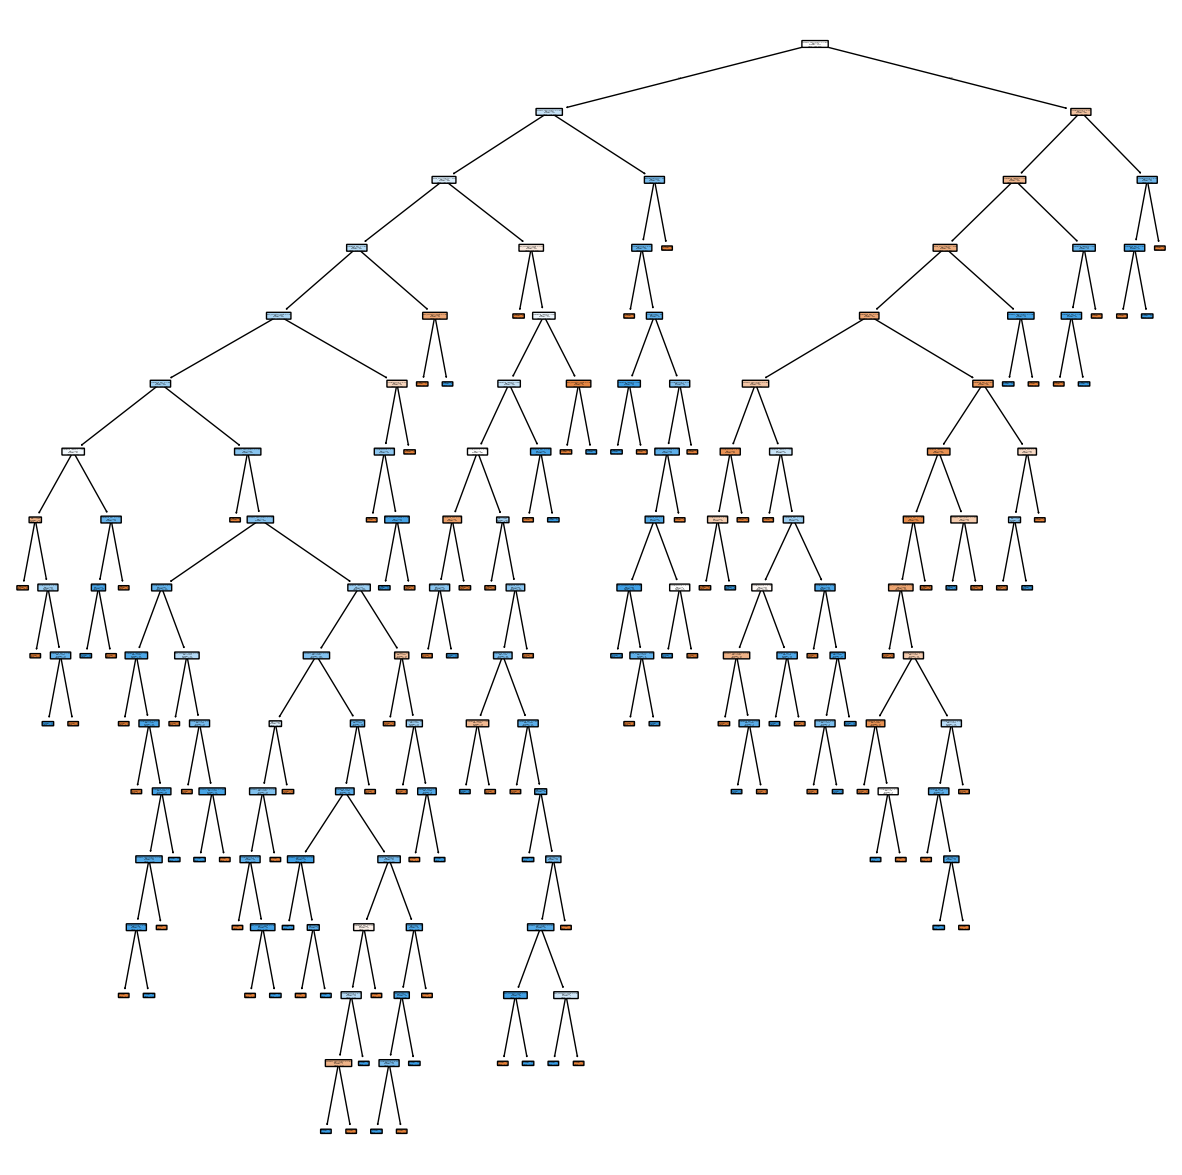

In [80]:
plt.figure(figsize=(15, 15))
plot_tree(model, feature_names=x.columns, filled=True, rounded=True)
plt.show()